<h3> <font color='green' style="text-align: center;"><p>CLASSIFICATION OF CHRONIC KIDNEY DISEASE</p></h3>

In [145]:
# Import the modules needed for the following code

import pandas as pd
import os
from glob import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

<!-- <h3><strong color='red'>Read the csv file for pre processing</h3> -->

In [132]:
# Read the flat file containing the data
path = 'C:/Users/Samarth/Desktop/Samarth/BITS/SEM 1/Data Mining/Assignments/1/Assignment_BLR'

In [133]:
_file = glob(os.path.join(path, "*.csv"))[1]
print("Processing this Input File: {0}".format(_file))
df = pd.read_csv(_file, encoding='utf-8', low_memory=False)

Processing this Input File: C:/Users/Samarth/Desktop/Samarth/BITS/SEM 1/Data Mining/Assignments/1/Assignment_BLR\kidneyChronic.csv


In [134]:
# Dictionary cosisting of the columns with appropriate column names

columns_to_be_mapped = {
    'age' : 'Age',
    'bp' : 'BloodPressure',
    'sg' : 'SpecificGravity',
    'al' : 'Albumin',
    'su' : 'Sugar',
    'rbc' : 'RedBloodCells',
    'pc' : 'PusCell',
    'pcc' : 'PusCellClumps',
    'ba' : 'Bacteria',
    'bgr' : 'BloodGlucoseRandom',
    'bu' : 'BloodUrea',
    'sc' : 'SerumCreatinine',
    'sod' : 'Sodium',
    'pot' : 'Potassium',
    'hemo' : 'Hemoglobin',
    'pcv' : 'PackedCellVolume',
    'wbcc' : 'WhiteBloodCellCount',
    'rbcc' : 'RedBloodCellCount',
    'htn' : 'Hypertension',
    'dm' : 'DiabetesMellitus',
    'cad' : 'CoronaryArteryDisease',
    'appet' : 'Appetite',
    'pe' : 'PedalEdema',
    'ane' : 'Anemia',
    'class' : 'Class'

}

In [135]:
# Rename the columns in the dataframe as per the above defined dictionary

df.rename(columns=columns_to_be_mapped, inplace=True) # Replace the columns names as the above dictionary

In [136]:
# Replace the '?' present to indicate the missing data with numpy.nan's

df.replace(['?', '?\t', '\t?'], np.nan, inplace=True)

In [122]:
def remove_outlier(df_in, col_name):
    """
    This function detects outliers and then removes the record containing it
    """
    print(df_in.shape)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print(df_out.shape)
    print("There were {0} records containing the outliers for the column{1}. These will be removed from further analysis.".format(df_in.shape[0] - df_out.shape[0], col_name))
    return df_out

In [137]:
numerical_columns = ['Age', 'BloodPressure', 'BloodGlucoseRandom', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Potassium', 
                    'Hemoglobin', 'PackedCellVolume', 'WhiteBloodCellCount', 'RedBloodCellCount']

# Missing data in the numerical columns are handled here by taking the mean of the columns

for count, i in enumerate(numerical_columns):
    df[i] = df[i].astype(float)
    df[i] = df[i].fillna(round(df[i].mean(), 2)) # fillna methods fill missing values with the mentioned result
    print("Number of blanks in column {0}: {1}".format(i, df[i].isnull().sum())) #Count the number of blanks, should ideally be 0
print("Number of Iterations=Number of columns = {0}".format(count+1))

# Further down we use the boxplots to figure out the outliers present in the data

Number of blanks in column Age: 0
Number of blanks in column BloodPressure: 0
Number of blanks in column BloodGlucoseRandom: 0
Number of blanks in column BloodUrea: 0
Number of blanks in column SerumCreatinine: 0
Number of blanks in column Sodium: 0
Number of blanks in column Potassium: 0
Number of blanks in column Hemoglobin: 0
Number of blanks in column PackedCellVolume: 0
Number of blanks in column WhiteBloodCellCount: 0
Number of blanks in column RedBloodCellCount: 0
Number of Iterations=Number of columns = 11


<h3><font color='pink'><p>Boxplot of the numerical columns to detect outliers, if any.</p></h3>

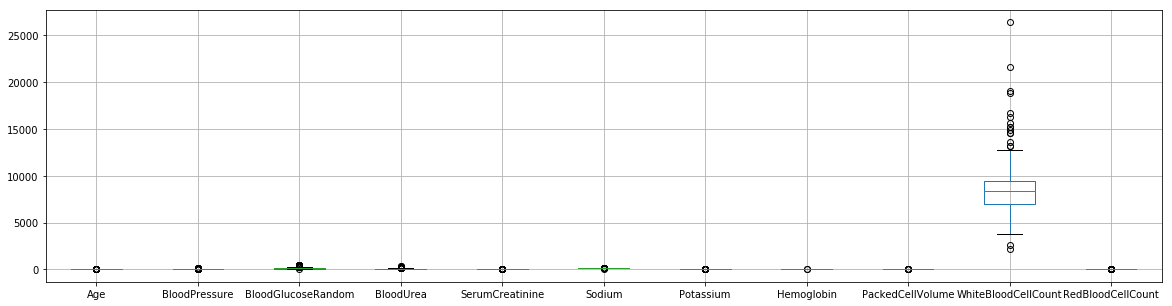

In [124]:
df[numerical_columns].boxplot(figsize=(20,5))

In [125]:
# As we see from the boxplot, there are outliers in the 10th numerical column(WhiteBloodCellCount). So we have to remove them.

df = remove_outlier(df, 'WhiteBloodCellCount')

(400, 25)
(383, 25)
There were 17 records containing the outliers for the columnWhiteBloodCellCount. These will be removed from further analysis.


<h3><font color='grey'><p>Boxplot after removing the outliers</p></h3>

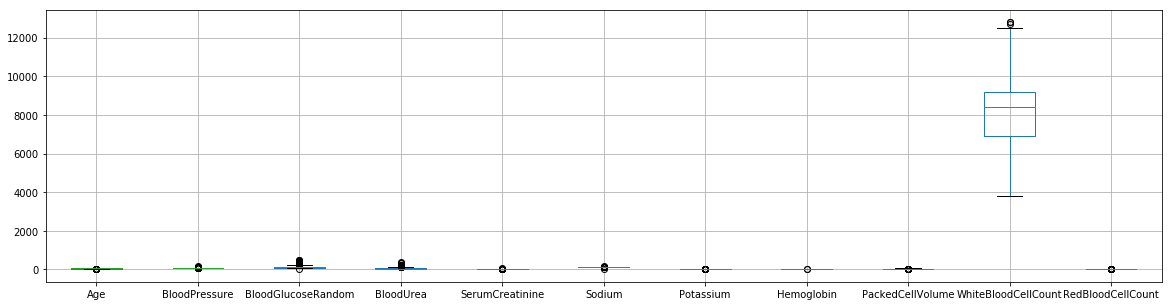

In [126]:
# After removing the outliers, the boxplot shows clean results

df[numerical_columns].boxplot(figsize=(20,5))

In [138]:
#  The nominal columns having missing data are just filled in with the most frequent occuring value in a particular column

nominal_cols = ['SpecificGravity', 'Albumin', 'Sugar', 'RedBloodCells', 'PusCell', 'PusCellClumps', 'Bacteria', 'Hypertension',
                'DiabetesMellitus', 'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia']

labelencoder = LabelEncoder()


imp_nominal = SimpleImputer(strategy="most_frequent")
df[nominal_cols] = df[nominal_cols].astype(str).apply(labelencoder.fit_transform)

In [139]:
# Create a test/train validation split to compare and get the accuracy results
X = df.iloc[:, 0:-1] 
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<h3><font color='red'><p>Using Decision Tree</p></h3>

In [143]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [111]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.961038961038961
Confusion matrix: 
 [[50  1]
 [ 2 24]]


<h3><font color='red'><p>Using Naive Bayes</p></h3>

In [ ]:
# Naive Bayes follows the same data pre processing as done in decision trees.
# The outliers are removed from the data and the classification is made on the remaining data.

In [141]:
clf = GaussianNB()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.95
Confusion matrix: 
 [[52  2]
 [ 2 24]]


<h3><font color='gold'><p>Comparing Algorithm Accuracies</p></h3>

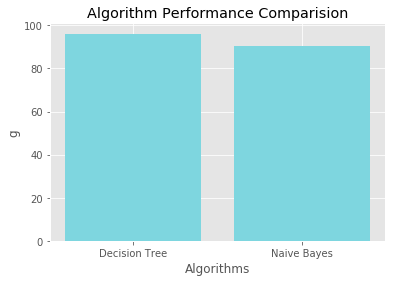

In [147]:
x = ["Decision Tree", "Naive Bayes"]
g = [96.1, 90.5]
plt.style.use('ggplot')
# x = ['Mercury', 'Venus', 'Earth', 'Mars']
# g = [3.76,9.04,9.8,3.77]
x_pos = np.arange(len(x))
plt.bar(x_pos, g, color='#7ed6df')
plt.xlabel("Algorithms")
plt.ylabel("g")
plt.title("Algorithm Performance Comparision")
plt.xticks(x_pos, x)
plt.show()